# Classifier3

In [90]:
# 0) importing our libraries
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [94]:
# 1) Creating our dataset
n_samples = 600
centers = np.array([[-1.0, -1.0], [-1.0, 1.0], [1.0, -1.0], [1.0, 1.0]])
X, Y = datasets.make_blobs(n_samples=n_samples,
                           centers=centers,
                           cluster_std=0.5,
                           random_state=11
                           )
x_data = torch.Tensor(X)
y_data = torch.Tensor(Y.reshape(n_samples)).type(torch.long)

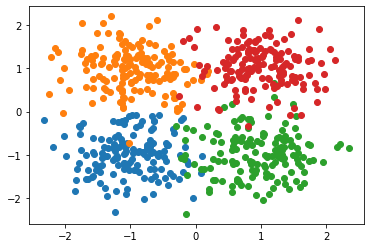

In [98]:
# 2) Showing our dataset
def dataset_scatter_plot(X, Y):
    plt.scatter(X[Y==0, 0], X[Y==0, 1])
    plt.scatter(X[Y==1, 0], X[Y==1, 1])
    plt.scatter(X[Y==2, 0], X[Y==2, 1])
    plt.scatter(X[Y==3, 0], X[Y==3, 1])
    
dataset_scatter_plot(X, Y)

In [139]:
# 3) Building our model
class Classifier3(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x
    
    def predict(self, x):
        _, max_indices = torch.max(self.forward(x), 1)
        return max_indices
    
model = Classifier3(2, 8, 4)
print(model)

Classifier3(
  (linear1): Linear(in_features=2, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=4, bias=True)
)


In [140]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [141]:
# 4) Training our model 

epochs = 1024
losses = []

for e in range(epochs):
    pred = model(x_data)
    loss = criterion(pred, y_data)
    losses.append(loss.item())
    
    print("epoch : ", e, ", loss : ", loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch :  0 , loss :  1.457771897315979
epoch :  1 , loss :  1.4537642002105713
epoch :  2 , loss :  1.4497805833816528
epoch :  3 , loss :  1.4458214044570923
epoch :  4 , loss :  1.4418859481811523
epoch :  5 , loss :  1.4379761219024658
epoch :  6 , loss :  1.4340920448303223
epoch :  7 , loss :  1.4302330017089844
epoch :  8 , loss :  1.4263972043991089
epoch :  9 , loss :  1.4225860834121704
epoch :  10 , loss :  1.4187995195388794
epoch :  11 , loss :  1.4150375127792358
epoch :  12 , loss :  1.4112982749938965
epoch :  13 , loss :  1.4075815677642822
epoch :  14 , loss :  1.4038872718811035
epoch :  15 , loss :  1.4002163410186768
epoch :  16 , loss :  1.396568775177002
epoch :  17 , loss :  1.3929429054260254
epoch :  18 , loss :  1.3893377780914307
epoch :  19 , loss :  1.3857535123825073
epoch :  20 , loss :  1.3821885585784912
epoch :  21 , loss :  1.3786420822143555
epoch :  22 , loss :  1.3751144409179688
epoch :  23 , loss :  1.3716052770614624
epoch :  24 , loss :  1.3681

epoch :  248 , loss :  0.708551824092865
epoch :  249 , loss :  0.7064637541770935
epoch :  250 , loss :  0.7043840885162354
epoch :  251 , loss :  0.7023130059242249
epoch :  252 , loss :  0.7002500891685486
epoch :  253 , loss :  0.6981942653656006
epoch :  254 , loss :  0.6961463689804077
epoch :  255 , loss :  0.6941074728965759
epoch :  256 , loss :  0.6920764446258545
epoch :  257 , loss :  0.690053403377533
epoch :  258 , loss :  0.688038170337677
epoch :  259 , loss :  0.6860308647155762
epoch :  260 , loss :  0.6840327978134155
epoch :  261 , loss :  0.6820430755615234
epoch :  262 , loss :  0.6800615191459656
epoch :  263 , loss :  0.678087592124939
epoch :  264 , loss :  0.6761213541030884
epoch :  265 , loss :  0.6741628050804138
epoch :  266 , loss :  0.6722121238708496
epoch :  267 , loss :  0.670269250869751
epoch :  268 , loss :  0.6683337688446045
epoch :  269 , loss :  0.6664058566093445
epoch :  270 , loss :  0.664484977722168
epoch :  271 , loss :  0.662571132183075

epoch :  503 , loss :  0.35308635234832764
epoch :  504 , loss :  0.3521844446659088
epoch :  505 , loss :  0.35128602385520935
epoch :  506 , loss :  0.35039129853248596
epoch :  507 , loss :  0.3494998812675476
epoch :  508 , loss :  0.3486115336418152
epoch :  509 , loss :  0.347726047039032
epoch :  510 , loss :  0.34684380888938904
epoch :  511 , loss :  0.3459642827510834
epoch :  512 , loss :  0.34508639574050903
epoch :  513 , loss :  0.344211220741272
epoch :  514 , loss :  0.3433390259742737
epoch :  515 , loss :  0.34246981143951416
epoch :  516 , loss :  0.3416036367416382
epoch :  517 , loss :  0.340740442276001
epoch :  518 , loss :  0.3398802876472473
epoch :  519 , loss :  0.33902329206466675
epoch :  520 , loss :  0.3381701707839966
epoch :  521 , loss :  0.3373202085494995
epoch :  522 , loss :  0.3364734649658203
epoch :  523 , loss :  0.33562982082366943
epoch :  524 , loss :  0.334789514541626
epoch :  525 , loss :  0.33395230770111084
epoch :  526 , loss :  0.3331

epoch :  762 , loss :  0.2104966938495636
epoch :  763 , loss :  0.21020708978176117
epoch :  764 , loss :  0.20991867780685425
epoch :  765 , loss :  0.20963145792484283
epoch :  766 , loss :  0.20934545993804932
epoch :  767 , loss :  0.2090606987476349
epoch :  768 , loss :  0.20877711474895477
epoch :  769 , loss :  0.20849475264549255
epoch :  770 , loss :  0.20821356773376465
epoch :  771 , loss :  0.2079337239265442
epoch :  772 , loss :  0.20765508711338043
epoch :  773 , loss :  0.20737767219543457
epoch :  774 , loss :  0.20710144937038422
epoch :  775 , loss :  0.20682641863822937
epoch :  776 , loss :  0.20655255019664764
epoch :  777 , loss :  0.20627987384796143
epoch :  778 , loss :  0.20600834488868713
epoch :  779 , loss :  0.20573803782463074
epoch :  780 , loss :  0.20546889305114746
epoch :  781 , loss :  0.20520098507404327
epoch :  782 , loss :  0.2049342393875122
epoch :  783 , loss :  0.20466862618923187
epoch :  784 , loss :  0.20440416038036346
epoch :  785 , 

epoch :  1008 , loss :  0.16505981981754303
epoch :  1009 , loss :  0.1649472862482071
epoch :  1010 , loss :  0.1648351103067398
epoch :  1011 , loss :  0.16472333669662476
epoch :  1012 , loss :  0.16461189091205597
epoch :  1013 , loss :  0.1645008772611618
epoch :  1014 , loss :  0.1643901765346527
epoch :  1015 , loss :  0.16427989304065704
epoch :  1016 , loss :  0.16416993737220764
epoch :  1017 , loss :  0.16406038403511047
epoch :  1018 , loss :  0.16395117342472076
epoch :  1019 , loss :  0.1638423502445221
epoch :  1020 , loss :  0.16373389959335327
epoch :  1021 , loss :  0.1636257767677307
epoch :  1022 , loss :  0.1635179966688156
epoch :  1023 , loss :  0.16341058909893036


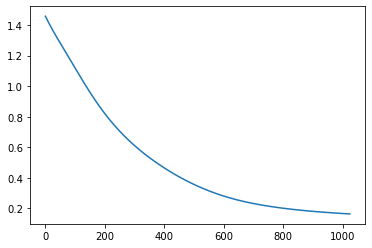

In [142]:
# 5) Showing loss 
plt.plot(range(epochs), losses)

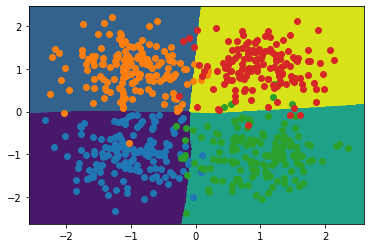

In [153]:
# 6) plot boundaries
def meshgrid_plot(X, Y):
    my_resolution = 500
    x_span = np.linspace(np.min(X[:, 0])-0.25,
                         np.max(X[:, 0])+0.25,
                         num=my_resolution
                         )
    y_span = np.linspace(np.min(X[:, 1])-0.25,
                         np.max(X[:, 1])+0.25,
                         num=my_resolution
                         )
    x_axis, y_axis = np.meshgrid(x_span, y_span)
    my_grid = np.c_[x_axis.ravel(), y_axis.ravel()]
    my_grid = torch.Tensor(my_grid)
    prediction_of_my_grid = model.predict(my_grid)
    prediction_of_my_grid = prediction_of_my_grid.detach().numpy()
    prediction_of_my_grid = prediction_of_my_grid.reshape(x_axis.shape)
    plt.contourf(x_axis, y_axis, prediction_of_my_grid)
    
meshgrid_plot(X, Y)
dataset_scatter(X, Y)